# 데이터 다운로드

In [ ]:
!wget https://github.com/dhrim/hongik_2021/raw/master/material/deep_learning/bladeDataset_original.zip

--2020-12-04 03:53:50--  https://github.com/dhrim/hongik_2021/raw/master/material/deep_learning/bladeDataset_original.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/deep_learning/bladeDataset_original.zip [following]
--2020-12-04 03:53:50--  https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/deep_learning/bladeDataset_original.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1075640 (1.0M) [application/zip]
Saving to: ‘bladeDataset_original.zip’

bladeDataset_origin 100%[===================>]   1.03M  --.-KB/s    in 0.02s   

2020-12-04 03:53

In [ ]:
!ls -al

total 1068
drwxr-xr-x 1 root root    4096 Dec  4 03:53 .
drwxr-xr-x 1 root root    4096 Dec  4 03:52 ..
-rw-r--r-- 1 root root 1075640 Dec  4 03:53 bladeDataset_original.zip
drwxr-xr-x 1 root root    4096 Nov 20 17:15 .config
drwxr-xr-x 1 root root    4096 Nov 13 17:33 sample_data


In [ ]:
!mkdir data.org
!cp bladeDataset_original.zip data.org/
%cd data.org
!unzip bladeDataset_original.zip

/content/data.org
Archive:  bladeDataset_original.zip
   creating: damaged/
  inflating: damaged/damage1.jpg     
  inflating: damaged/damage10_1.jpg  
  inflating: damaged/damage11_1.jpg  
  inflating: damaged/damage11_2.jpg  
  inflating: damaged/damage11_3.jpg  
  inflating: damaged/damage12_1.jpg  
  inflating: damaged/damage12_2.jpg  
  inflating: damaged/damage12_3.jpg  
  inflating: damaged/damage13_1.jpg  
  inflating: damaged/damage13_2.jpg  
  inflating: damaged/damage13_3.jpg  
  inflating: damaged/damage14_1.jpg  
  inflating: damaged/damage14_2.jpg  
  inflating: damaged/damage14_3.jpg  
  inflating: damaged/damage1_1.jpg   
  inflating: damaged/damage1_2.jpg   
  inflating: damaged/damage1_3.jpg   
  inflating: damaged/damage1_4.jpg   
  inflating: damaged/damage1_5.jpg   
  inflating: damaged/damage1_6.jpg   
  inflating: damaged/damage21_1.jpg  
  inflating: damaged/damage21_2.jpg  
  inflating: damaged/damage21_3.jpg  
  inflating: damaged/damage21_4.jpg  
  inflating:

In [ ]:
!pwd

/content/data.org


In [ ]:
!ls -al

total 1076
drwxr-xr-x 6 root root    4096 Dec  4 03:53 .
drwxr-xr-x 1 root root    4096 Dec  4 03:53 ..
-rw-r--r-- 1 root root 1075640 Dec  4 03:53 bladeDataset_original.zip
drwxr-xr-x 2 root root    4096 Nov 26 14:25 damaged
drwxr-xr-x 2 root root    4096 Nov 26 14:25 intact
drwxr-xr-x 2 root root    4096 Nov 26 14:25 root
drwxr-xr-x 2 root root    4096 Nov 26 14:25 surface


# 데이터 준비

In [ ]:
%cd /content

/content


In [ ]:
!mkdir -p data/train/damaged
!mkdir -p data/train/intact
!mkdir -p data/train/root
!mkdir -p data/train/surface

!mkdir -p data/test/damaged
!mkdir -p data/test/intact
!mkdir -p data/test/root
!mkdir -p data/test/surface

In [ ]:
!cp data.org/damaged/* data/train/damaged/
!cp data.org/intact/* data/train/intact/
!cp data.org/root/* data/train/root/
!cp data.org/surface/* data/train/surface/

In [ ]:
!mv data/train/damaged/*1.jpg data/test/damaged/
!mv data/train/intact/*1.jpg data/test/intact/
!mv data/train/root/*1.jpg data/test/root/
!mv data/train/surface/*1.jpg data/test/surface/

In [ ]:
!ls -al data/train/damaged/*.jpg | wc
!ls -al data/test/damaged/*.jpg | wc

!ls -al data/train/intact/*.jpg | wc
!ls -al data/test/intact/*.jpg | wc

!ls -al data/train/root/*.jpg | wc
!ls -al data/test/root/*.jpg | wc

!ls -al data/train/surface/*.jpg | wc
!ls -al data/test/surface/*.jpg | wc

     87     783    6509
     35     315    2578
     73     657    5395
     45     405    3277
     85     765    5950
     25     225    1725
     56     504    4251
     44     396    3297


# 모델 정의와 학습

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))


optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])


train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "data/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "data/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)


model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10
)

loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/64
)
print("loss=", loss)
print("acc=", acc)

y_ = model.predict(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


58892288/58889256 [==============================] - 0s 0us/step
Found 301 images belonging to 4 classes.
Found 149 images belonging to 4 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
5/4 [===============================] - 6s 1s/step - loss: 5.7762 - acc: 0.5581 - val_loss: 1.6166 - val_acc: 0.7651
Epoch 2/10
5/4 [===============================] - 3s 693ms/step - loss: 0.4670 - acc: 0.9003 - val_loss: 1.0152 - val_acc: 0.8322
Epoch 3/10
5/4 [===============================] - 3s 691ms/step - loss: 0.2840 - acc: 0.9336 - val_loss: 0.9226 - val_acc: 0.8456
Epoch 4/10
5/4 [===============================] - 4s 745ms/step - loss: 0.3132 - acc: 0.9435 - val_loss: 0.4859 - val_acc: 0.8993
Epoch 5/10
5/4 [===============================] - 3s 697ms/step - loss: 0.2334 - acc: 0.9635 - val_loss: 0.4587 - val_acc: 0.8859
Epoch 6/10
5/4 [===============================] - 4s 755ms/step - loss: 0.0815 - acc: 0.9701 - val_loss: 0.3321 - val_acc: 0

Found 149 images belonging to 4 classes.


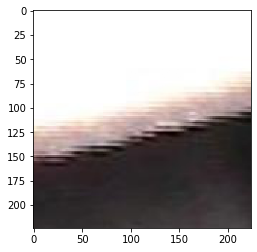

intact


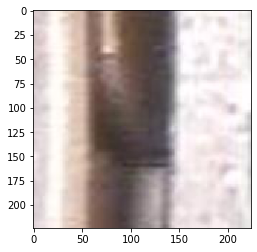

root


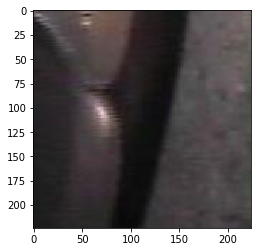

root


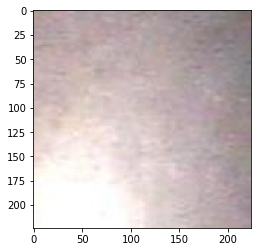

surface


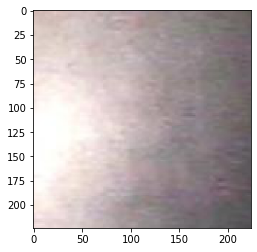

surface


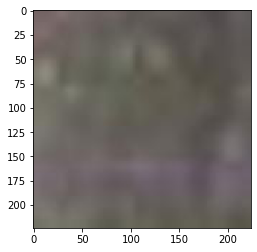

surface


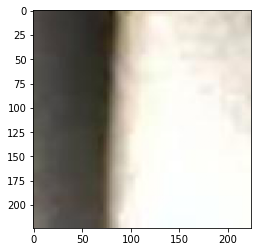

intact


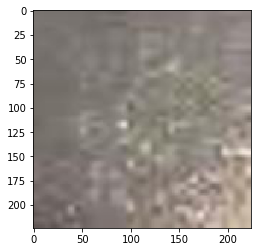

surface


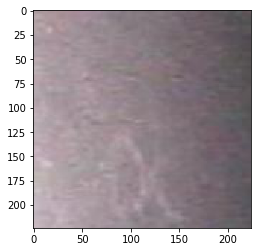

surface


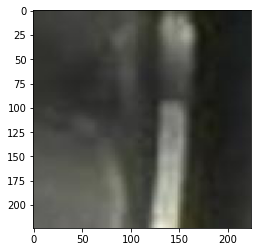

damaged


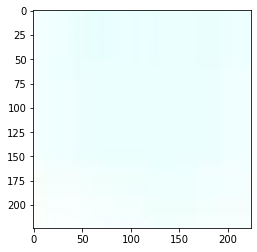

surface


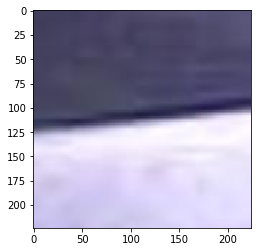

intact


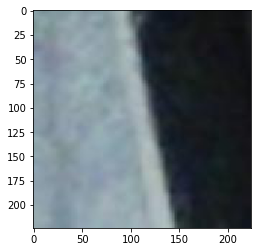

intact


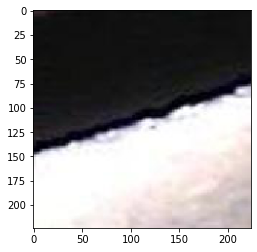

intact


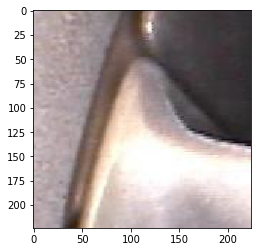

root


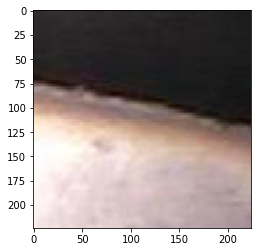

intact


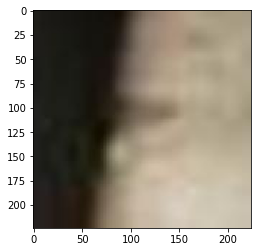

damaged


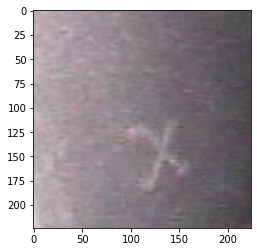

surface


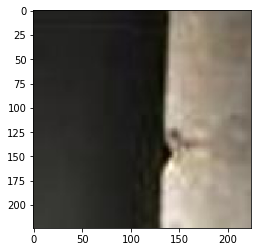

damaged


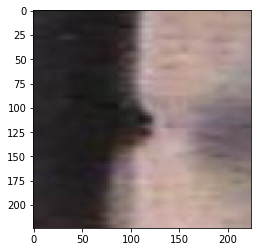

damaged


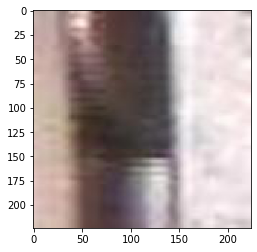

root


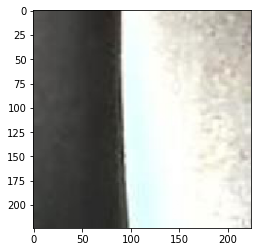

intact


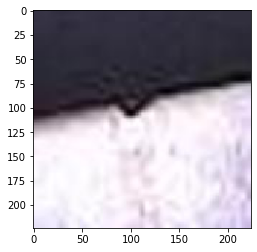

damaged


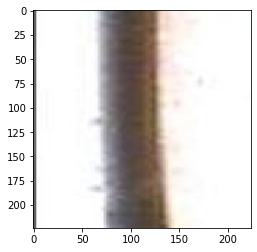

root


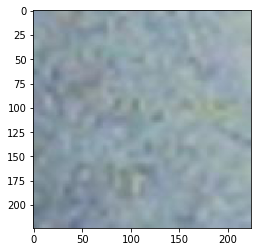

surface


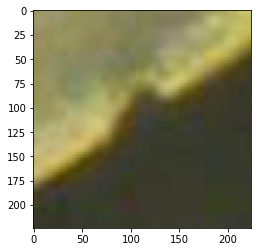

damaged


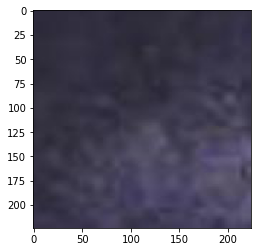

surface


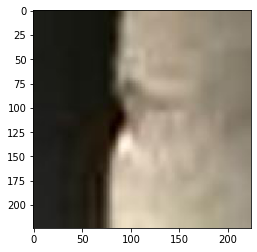

damaged


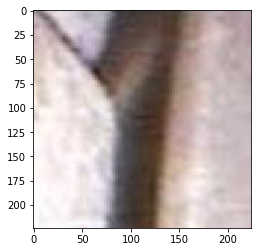

root


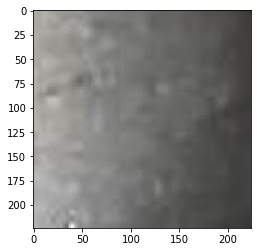

surface


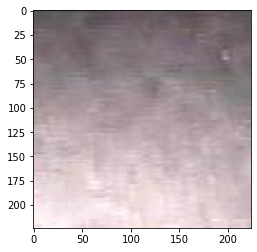

surface


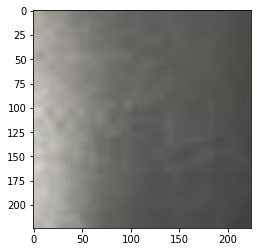

surface


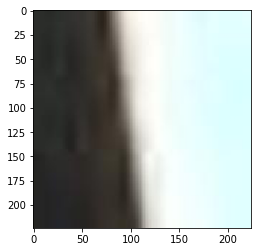

intact


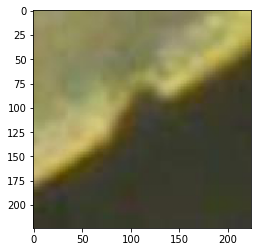

damaged


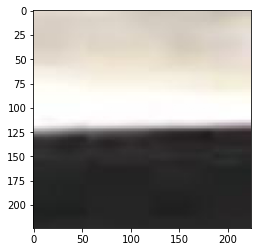

intact


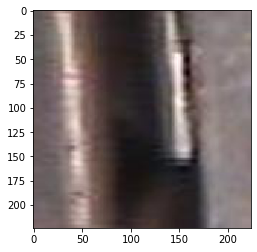

root


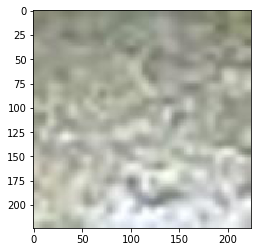

surface


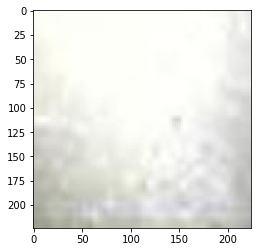

surface


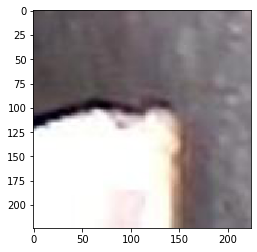

damaged


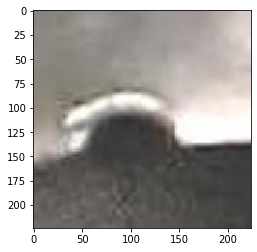

damaged


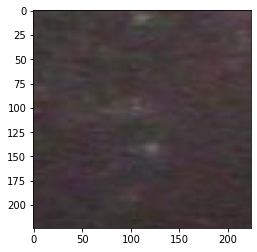

surface


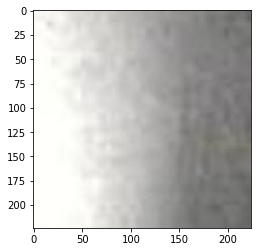

surface


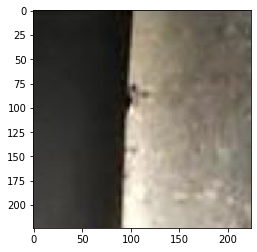

damaged


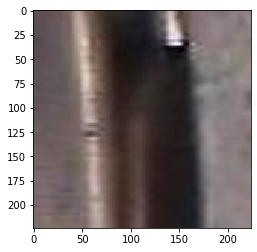

root


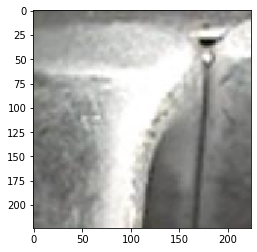

damaged


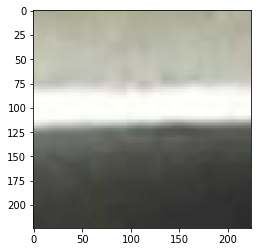

intact


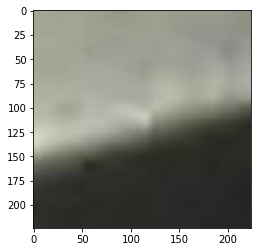

intact


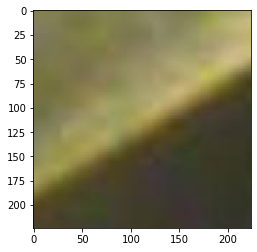

intact


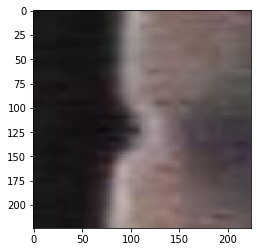

damaged


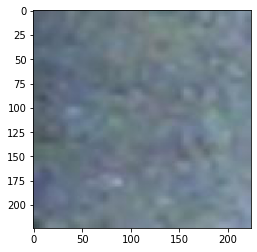

surface


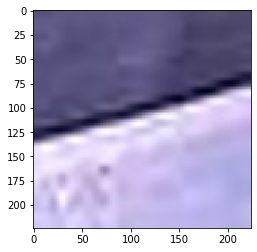

intact


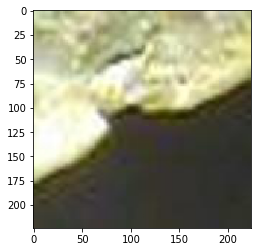

damaged


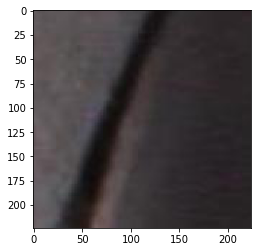

root


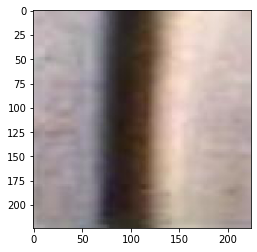

root


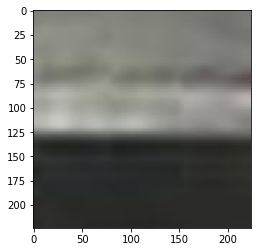

intact


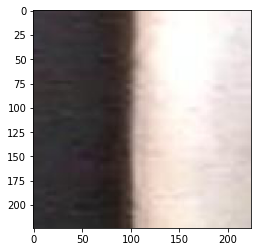

root


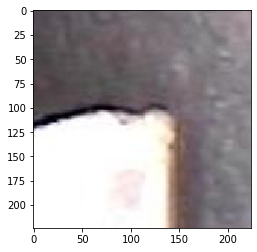

damaged


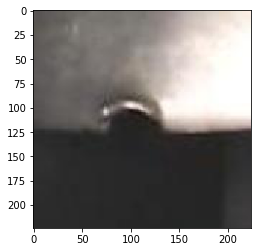

damaged


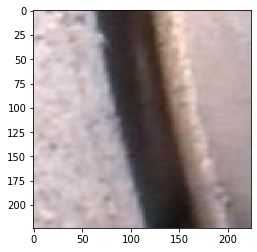

root


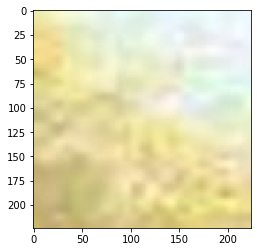

surface


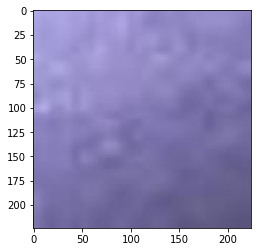

surface


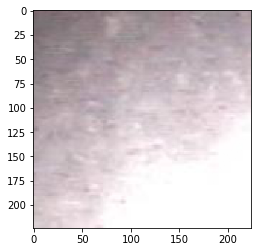

surface


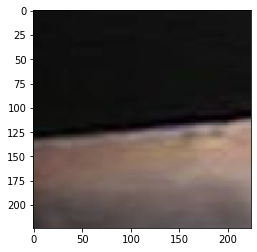

intact


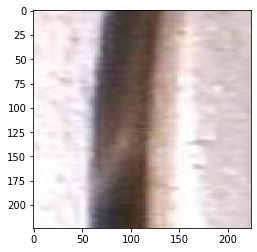

root


In [ ]:
not_preprocessing_test_data_generator = ImageDataGenerator(
).flow_from_directory(
      "data/test",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

batch_test_data, _ = next(not_preprocessing_test_data_generator)
preprocessed_batch_test_data = vgg16.preprocess_input(batch_test_data.copy())

y_ = model.predict(preprocessed_batch_test_data)
predicted = np.argmax(y_, axis=1)


for i in range(len(batch_test_data)):
  plt.imshow(batch_test_data[i]/255.)
  plt.show()
  print(custom_labels[predicted[i]])
